Use this cell for all your imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
from scipy.sparse import csr_matrix

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [2]:
with open('data.txt', 'r') as f:
    # skip the first three lines
    for _ in range(3):
        next(f)
    
    # read the data and convert to integers
    data = []
    for line in f:
        if not line.startswith('#'):
            from_node, to_node = map(int, line.strip().split())
            data.append((from_node, to_node))

Use this cell to normalize the matrix as you see fit.

In [3]:
n_nodes = np.max(data)  # assumes that node IDs start at 1 and are consecutive integers
row, col = np.array(data).T - 1  # convert to 0-based indexing
normalized_matrix = csr_matrix((np.ones(len(data)), (row, col)), shape=(n_nodes, n_nodes))

Apply the PageRank algorithm to the matrix you created.

In [4]:
import numpy as np
from scipy.sparse import csr_matrix

# Set PageRank parameters
alpha = 0.85  # damping factor
max_iter = 100  # maximum number of iterations
tolerance = 1e-6  # convergence tolerance

# Initialize PageRank scores
num_nodes = normalized_matrix.shape[0]
pagerank = np.ones(num_nodes) / num_nodes

# Run PageRank algorithm
for i in range(max_iter):
    prev_pagerank = pagerank.copy()
    pagerank = normalized_matrix.dot(pagerank) * alpha + (1 - alpha) / num_nodes
    delta = np.abs(pagerank - prev_pagerank).sum()
    if delta < tolerance:
        print(f"Converged after {i+1} iterations")
        break


Output a list of the 100 most important papers along with their importance

In [7]:
# Sort nodes by PageRank score in descending order
pagerank_scores = {i: score for i, score in enumerate(pagerank)}

sorted_nodes = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

for node, score in sorted_nodes[:100]:
    print(f"Paper ID: {node}\tImportance Score: {score}")

Paper ID: 304231	Importance Score: 5.2317767062447375e+94
Paper ID: 211177	Importance Score: 3.948822774902738e+94
Paper ID: 304113	Importance Score: 3.479694327975449e+94
Paper ID: 303059	Importance Score: 3.3095613403282933e+94
Paper ID: 301249	Importance Score: 3.2142674544866087e+94
Paper ID: 304024	Importance Score: 3.002040510182118e+94
Paper ID: 303219	Importance Score: 2.9589440865898464e+94
Paper ID: 302063	Importance Score: 2.689789820608318e+94
Paper ID: 301035	Importance Score: 2.614651598456695e+94
Paper ID: 303222	Importance Score: 2.4871253615769376e+94
Paper ID: 301149	Importance Score: 2.2819492738320783e+94
Paper ID: 303106	Importance Score: 2.239460681710582e+94
Paper ID: 303143	Importance Score: 2.136158018154142e+94
Paper ID: 301185	Importance Score: 2.1005063021908346e+94
Paper ID: 211216	Importance Score: 2.0417475646965855e+94
Paper ID: 302149	Importance Score: 2.0376450983562766e+94
Paper ID: 212268	Importance Score: 1.9974745784946407e+94
Paper ID: 210223	Impo

Visualize your results

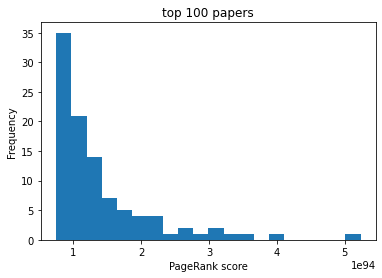

In [8]:
# Create a list of the top 100 paper scores
top_scores = [score for _, score in sorted_scores[:100]]

plt.hist(top_scores, bins=20)
plt.xlabel('PageRank score')
plt.ylabel('Frequency')
plt.title('top 100 papers')
plt.show()